## Suven Consultants & Technology Pvt. Ltd.

## By Satish Kumar Pal Recognizing Handwritten Digits with scikit-learn 

## Import Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
%matplotlib inline


## Load Datasets

In [2]:
digits = datasets.load_digits()

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [48]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [5]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
clf = svm.SVC(gamma=0.001, C=100)

In [7]:
print(len(digits.data))

1797


## Learning and Predicting

In [35]:
clf.predict(digits.data[1791:1796])

array([4, 9, 0, 8, 9])

In [39]:
digits.target[1791:1796]

array([4, 9, 0, 8, 9])

In [36]:
print("prediction",clf.predict(digits.data[1791:1796]))

prediction [4 9 0 8 9]


## Analyze a sample image

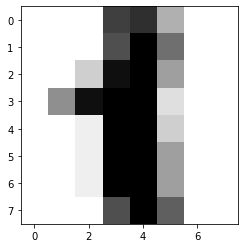

In [42]:
plt.imshow(digits.images[1], cmap=plt.cm.gray_r,interpolation = "nearest")
plt.show()

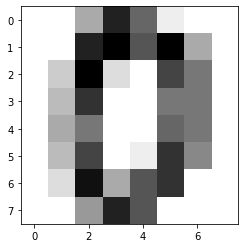

In [16]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r,interpolation = "nearest")
plt.show()

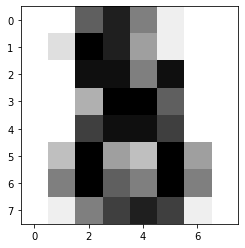

In [44]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r,interpolation = "nearest")
plt.show()

## Visualize first 15 images

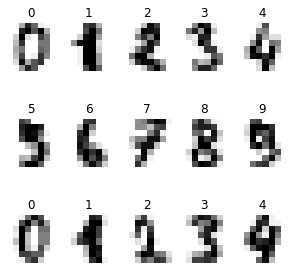

In [18]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

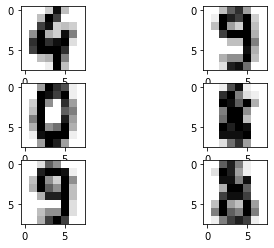

In [46]:
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')

## Input Split

In [47]:
X,y = digits.data[1:1790],digits.target[1:1790]

In [32]:
clf.fit(digits.data[1:1790], digits.target[1:1790])


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
print("shape of X =" , X.shape)
print("shape of y =" , y.shape)

shape of X = (1789, 64)
shape of y = (1789,)


## Train Test Spliting

In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
print("shape of X_train=", X_train.shape)
print("shape of X_test=", X_test.shape)
print("shape of y_train=", y_train.shape)
print("shape of y_test=", y_test.shape)

shape of X_train= (1341, 64)
shape of X_test= (448, 64)
shape of y_train= (1341,)
shape of y_test= (448,)


In [55]:
from sklearn.svm import SVC

In [66]:
clf = SVC(kernel='linear',degree=3,gamma="scale")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9821428571428571

In [62]:
y_pred = clf.predict(X_test)
y_pred

array([8, 0, 9, 5, 1, 1, 0, 4, 4, 7, 0, 5, 9, 2, 2, 9, 4, 1, 3, 5, 6, 7,
       6, 3, 1, 5, 3, 0, 4, 0, 5, 9, 5, 2, 4, 9, 3, 2, 7, 7, 7, 1, 8, 4,
       8, 0, 6, 8, 1, 9, 2, 4, 4, 6, 0, 3, 0, 0, 4, 4, 4, 5, 0, 5, 3, 8,
       5, 5, 3, 4, 5, 3, 6, 6, 9, 3, 7, 9, 2, 1, 0, 7, 2, 1, 0, 8, 2, 6,
       5, 9, 9, 9, 9, 5, 3, 0, 7, 9, 7, 2, 4, 3, 5, 2, 9, 2, 4, 5, 3, 6,
       9, 0, 7, 1, 9, 6, 8, 9, 1, 9, 4, 2, 0, 2, 1, 0, 2, 5, 6, 1, 3, 1,
       6, 0, 1, 3, 9, 9, 3, 1, 6, 4, 6, 5, 6, 8, 9, 6, 5, 6, 0, 7, 0, 0,
       2, 2, 3, 7, 3, 0, 7, 5, 6, 6, 4, 3, 8, 4, 3, 0, 2, 5, 5, 3, 2, 3,
       7, 2, 5, 9, 2, 8, 6, 6, 3, 4, 0, 2, 9, 3, 4, 4, 3, 6, 6, 7, 9, 2,
       3, 6, 6, 1, 1, 7, 2, 4, 9, 7, 9, 3, 4, 3, 5, 6, 6, 5, 3, 7, 7, 0,
       1, 0, 8, 5, 3, 5, 1, 5, 5, 4, 2, 1, 9, 0, 7, 3, 9, 6, 6, 1, 1, 7,
       9, 7, 1, 2, 5, 8, 1, 9, 1, 6, 5, 8, 1, 0, 4, 6, 1, 3, 5, 3, 9, 6,
       3, 4, 6, 3, 4, 5, 0, 9, 5, 4, 3, 8, 2, 9, 8, 4, 8, 2, 0, 6, 9, 5,
       4, 1, 7, 4, 6, 1, 4, 2, 6, 5, 6, 0, 8, 4, 7,

In [67]:
clf_rbf = SVC(kernel='rbf',degree=3,gamma="scale")
clf_rbf.fit(X_train,y_train)
y_pred = clf_rbf.predict(X_test)
clf_rbf.score(X_test, y_test)

0.9799107142857143

## Check for Prediction Dataset

In [68]:
from sklearn.metrics import classification_report
prediction = clf.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        50
           4       1.00      1.00      1.00        45
           5       0.98      0.96      0.97        49
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        45
           8       0.95      0.95      0.95        37
           9       0.98      0.96      0.97        46

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448

